### Logistic Regression
- Estimates the probability of an event occurring based on independent variables
- Models a binary outcome (True/False, Yes/No)
    - In this example, the outcome is either win or loss
- Equation: $$ f(x) = {e^{b} \over (1+e^{-x})} $$

### Prerequisite:
- Download Anaconda (https://www.anaconda.com/download)
- Install Github (https://gitforwindows.org/) (optional)
- Set up Github account (optional)
- Clone repository (git clone https://github.com/Krescenskok/DataScienceSessions.git) (optional)
- Useful git commands (https://git-scm.com/docs)

### Problem Statement and Hypothesis
- Research Question: Can the business predict opportunity outcomes?
- Alternate Hypothesis: Yes, we can predict opportunity outcomes
- Null Hypothesis: No, we cannot predict opportunity outcomes

### Why is it important to predict an opportunity with statistical significance?
- Anticipate sales for CST and other leadership
- Help influence a positive behavior


**Expected Outcome:** To have a model that can generalize trends in data using significant variables to predict a win or a loss.
- Understand which opportunity variables are most significant
- Figure out the accuracy of the model

**Data Collection Concerns:**
- Dataset needs to have at least 10,000 records to prevent bias
- At least 10 variables 
- At least 1 continuous and 1 categorical variable
- Rights to use the data

**Data Variables:**
- **Independent (x<sub>1</sub>-x<sub>n</sub>):** All other variables
- **Dependent (Y):** Stage (Categorical variable - Outcomes are only win or loss)
    - Logistic regressions are used to predict categorical outcomes

**Packages:**
- **pandas:** Used for dataframes
- **pyodbc:** Used to connect to SQL Server
- **sklearn/stats model API:** Used for our logistic model
    - Create train and test sets
    - Recursive feature elimination
    - Accuracy/precision/matrix scores
    - Receiver operator characteristic
- **seaborn/matplotlib:** Used for visualization

**Preprocessing Technique:**
- Import packages and load data
- Review the data
    - head(), info()
    - Handle missingness, outliers
- Exploratory analysis
- Variable selection

### Import Packages and load data

In [370]:
#import packages
import pyodbc as db
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#connect to DB
server = 'tcp:usaepwvds025.database.windows.net' 
database = 'SIMS' 
username = 'ciaserviceaccount' 
password = 'pipeline$330' 
cnxn = db.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

#load dataframe
sql = "select * from sims.logisticRegression"
df = pd.read_sql(sql,cnxn)


### Review the data
- Understand data types (Continuous vs Categorical)
- Investigate missingness
- Scale
- Outliers

In [371]:
df.head()

,LegacySFInstance,LegacyAccountID,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyID,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityID,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,StartDate,OpportunityOwner,StageName,CloseReason,CloseComments,ImpactedFY
0,RxC,0013s00000uY8t8AAC,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",NaN,NaN,None,None,None,0063s00000DSJH9AAP,Coram/CVS Copay Finder,New,NaN,2019-08-06 19:15:55,None,Andrew Burman,Closed Lost,No Bid,Nothing materialized with the client.,FY 2020
1,RxC,0013s00000xIwQOAA0,Caris-MPI,Caris-MPI,NaN,NaN,None,None,None,0063s00000EAht5AAD,Precision Medicine Survey,New,200000.0,2017-05-31 15:15:14,None,Jennifer Frytak,Closed Lost,Client Funding Cut,None,FY 2018
2,RxC,0013s00000zTk3cAAC,Pharma Pac,Pharma Pac,NaN,NaN,None,None,None,0063s00000DUuUEAA1,Pharma Pac,New,173838.0,2020-04-09 15:52:13,2021-04-12,Ryan Grimmett,Closed Lost,Cancelled,None,FY 2022
3,RxC,0013s000011ZefwAAC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,NaN,NaN,None,None,None,0063s00000EwxCLAAZ,Biologics RARE - Launched for FY22 Tracking,Renewal,44986789.0,2021-02-04 14:55:41,2021-04-01,Laura Sieve,Closed Won,None,None,FY 2022
4,RxC,0013s000011ZefwAAC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,NaN,NaN,None,None,None,0063s00000ExCSbAAN,Biologics ONC - Launched for FY22 Tracking,Renewal,18086000.0,2021-04-27 15:01:37,2021-04-01,Laura Sieve,Closed Won,None,None,FY 2022


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27536 entries, 0 to 27535
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   LegacySFInstance                 27536 non-null  object        
 1   LegacyAccountID                  27536 non-null  object        
 2   LegacyAccountName                27516 non-null  object        
 3   CurrentCompanyGroup              27516 non-null  object        
 4   CurrentCompanyID                 27459 non-null  float64       
 5   CurrentCompanyMarketCap          23084 non-null  float64       
 6   CurrentCompanyMarketCapCategory  27459 non-null  object        
 7   Top12CMMCompany                  10027 non-null  object        
 8   Top24CMMCompany                  4452 non-null   object        
 9   OpportunityID                    27536 non-null  object        
 10  OpportunityName                  27536 non-null  object   

#### Drop ID Columns
- Looking for patterns in the data. Since the ID columns are unique, this won't help us in predicting our win/loss opportunities

In [246]:
df = df.drop(columns=['LegacyAccountID', 'CurrentCompanyID', 'OpportunityID'])

We can't impute comments, so we will drop `CloseComments` from our dataset

In [247]:
df = df.drop(columns = 'CloseComments')

Since we have `CreateDate` that have no null values, we will use this column and drop `StartDate`

In [248]:
df = df.drop(columns = 'StartDate')

In [249]:
df.query('LegacyAccountName != LegacyAccountName')

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,OpportunityOwner,StageName,CloseReason,ImpactedFY
57,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) Prior Authorization Pl...,Renewal,105250.00,2020-03-02 15:53:43,Amanda Tegeder,Closed Won,None,FY 2022
58,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) Prior Authorization Pl...,Renewal,105125.00,2021-05-10 17:42:46,David Prevo,Closed Won,None,FY 2023
59,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) HubExpress,New,148435.00,2021-04-19 14:40:04,Josh Lobs,Closed Lost,Budget,FY 2022
60,CMM,None,None,NaN,None,None,None,MDD Xadago (Safinamide) Prior Authorization Pl...,Renewal,90575.00,2022-05-26 16:39:30,David Prevo,Closed Won,None,FY 2024
61,CMM,None,None,NaN,None,None,None,testpharma Brand 1 Test Prior Authorization Pl...,Renewal,50010.00,2019-01-03 21:30:43,Julie Fielding,Closed Lost,None,FY 2019
62,CMM,None,None,NaN,None,None,None,testpharma Brand4 IAN,New,350000.00,2020-10-30 13:44:15,Julie Fielding,Closed Lost,No Bid,FY 2021
63,CMM,None,None,NaN,None,None,None,testpharma Brand 1 Test Provider Medication Al...,New,15.00,2021-02-02 16:27:41,Julie Fielding,Closed Lost,No Bid,FY 2021
64,CMM,None,None,NaN,None,None,None,testpharma BrandABC Prior Authorization Plus,New,1740232.24,2021-10-29 14:21:29,Jason Kemble,Closed Lost,No Bid,FY 2022
65,CMM,None,None,NaN,None,None,None,testpharma BB TEST BRAND Prior Authorization Plus,New,198042.50,2021-11-30 19:44:20,Caroline Savoy,Closed Lost,No Bid,FY 2022
66,CMM,None,None,NaN,None,None,None,testpharma BB TEST BRAND Prior Authorization Plus,New,174042.50,2021-11-30 20:01:53,Caroline Savoy,Closed Lost,No Bid,FY 2022


In [250]:
df.dropna(subset=['LegacyAccountName'], inplace=True)

Impute a value for missing market caps
- Average value in the market cap category
- Some companies don't have a market cap category, so we will first impute market cap categories

In [251]:
modeMarketCap = df['CurrentCompanyMarketCapCategory'].mode()
print(modeMarketCap)
df['CurrentCompanyMarketCapCategory'].fillna(df['CurrentCompanyMarketCapCategory'].mode()[0], inplace=True)

0    Large
Name: CurrentCompanyMarketCapCategory, dtype: object


In [252]:
meanMarketCap = df.groupby('CurrentCompanyMarketCapCategory')['CurrentCompanyMarketCap'].mean().reset_index()
print(meanMarketCap)
totalMeanMarketCap = df['CurrentCompanyMarketCap'].mean()
print(totalMeanMarketCap)

  CurrentCompanyMarketCapCategory  CurrentCompanyMarketCap
0                           Large             8.922738e+10
1                          Medium             5.178806e+09
2                            Mega             3.617039e+11
3                           Micro             8.615721e+07
4                   Not Available                      NaN
5                         Private                      NaN
6                           Small             1.121986e+09
133181497975.68924


In [253]:
df['CurrentCompanyMarketCap'] = df['CurrentCompanyMarketCap'].fillna(df.groupby('CurrentCompanyMarketCapCategory')['CurrentCompanyMarketCap'].transform('mean'))

In [254]:
df['CurrentCompanyMarketCap'].fillna(totalMeanMarketCap, inplace = True)

In [255]:
df['Top12CMMCompany'].fillna('False', inplace = True)
df['Top24CMMCompany'].fillna('False', inplace = True)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27516 entries, 0 to 27535
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   LegacySFInstance                 27516 non-null  object        
 1   LegacyAccountName                27516 non-null  object        
 2   CurrentCompanyGroup              27516 non-null  object        
 3   CurrentCompanyMarketCap          27516 non-null  float64       
 4   CurrentCompanyMarketCapCategory  27516 non-null  object        
 5   Top12CMMCompany                  27516 non-null  object        
 6   Top24CMMCompany                  27516 non-null  object        
 7   OpportunityName                  27516 non-null  object        
 8   OpportunityType                  27516 non-null  object        
 9   TotalOpportunityAmount           26187 non-null  float64       
 10  CreateDate                       27516 non-null  datetime64[ns]

In [257]:
avgTotalOppAmt = df['TotalOpportunityAmount'].mean()
print(avgTotalOppAmt)
df['TotalOpportunityAmount'].fillna(avgTotalOppAmt, inplace = True)

748132.8779913697


In [258]:
CloseReasonMode = df['CloseReason'].mode()
print(CloseReasonMode)

df.loc[(df['CloseReason'].isna()) & (df['StageName'] == "Closed Lost"), 'CloseReason'] = "CloseReasonMode"

df.loc[(df['CloseReason'].isna()) & (df['StageName'] == "Closed Won"), 'CloseReason'] = "Won"


0    No Bid
Name: CloseReason, dtype: object


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27516 entries, 0 to 27535
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   LegacySFInstance                 27516 non-null  object        
 1   LegacyAccountName                27516 non-null  object        
 2   CurrentCompanyGroup              27516 non-null  object        
 3   CurrentCompanyMarketCap          27516 non-null  float64       
 4   CurrentCompanyMarketCapCategory  27516 non-null  object        
 5   Top12CMMCompany                  27516 non-null  object        
 6   Top24CMMCompany                  27516 non-null  object        
 7   OpportunityName                  27516 non-null  object        
 8   OpportunityType                  27516 non-null  object        
 9   TotalOpportunityAmount           27516 non-null  float64       
 10  CreateDate                       27516 non-null  datetime64[ns]

In [260]:
df['CreateDateMonth'] = df['CreateDate'].dt.month 

In [261]:
display(df)

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,OpportunityOwner,StageName,CloseReason,ImpactedFY,CreateDateMonth
0,RxC,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",8.922738e+10,Large,False,False,Coram/CVS Copay Finder,New,7.481329e+05,2019-08-06 19:15:55,Andrew Burman,Closed Lost,No Bid,FY 2020,8
1,RxC,Caris-MPI,Caris-MPI,8.922738e+10,Large,False,False,Precision Medicine Survey,New,2.000000e+05,2017-05-31 15:15:14,Jennifer Frytak,Closed Lost,Client Funding Cut,FY 2018,5
2,RxC,Pharma Pac,Pharma Pac,8.922738e+10,Large,False,False,Pharma Pac,New,1.738380e+05,2020-04-09 15:52:13,Ryan Grimmett,Closed Lost,Cancelled,FY 2022,4
3,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.922738e+10,Large,False,False,Biologics RARE - Launched for FY22 Tracking,Renewal,4.498679e+07,2021-02-04 14:55:41,Laura Sieve,Closed Won,Won,FY 2022,2
4,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.922738e+10,Large,False,False,Biologics ONC - Launched for FY22 Tracking,Renewal,1.808600e+07,2021-04-27 15:01:37,Laura Sieve,Closed Won,Won,FY 2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27531,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331815e+11,Not Available,False,False,Biocon Biologics_TS SOW,New,6.298000e+04,2023-06-14 21:23:02,Laura Redman,Closed Won,Won,FY 2024,6
27532,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331815e+11,Not Available,False,False,"Biocon Biologics_State Insulin Prog (MN, CO, ME)",New,1.175200e+05,2023-06-29 23:19:29,Laura Redman,Closed Won,Won,FY 2024,6
27533,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331815e+11,Not Available,False,False,"Biocon Biologics_LS, TS & State Insulin Imp SOW",New,0.000000e+00,2023-06-29 23:25:26,Laura Redman,Closed Won,Won,FY 2024,6
27534,RHP,Biocon Biologics Inc.,Biocon Biologics Inc.,1.331815e+11,Not Available,False,False,"Biocon Biologics_State Insulin Prog (MN, CO, M...",New,0.000000e+00,2024-01-15 17:36:03,Laura Redman,Closed Lost,No Bid,FY 2024,1


## Outliers
- Outliers can skew the results of data analysis and impact model performance
- Handling Outliers: 
    - Remove
    - Impute
    - Scale/Standardize

In [221]:
df.describe()

,CurrentCompanyMarketCap,TotalOpportunityAmount,CreateDate,CreateDateMonth
count,2.751600e+04,2.751600e+04,27516,27516.000000
mean,1.330904e+11,7.481329e+05,2018-01-10 03:30:22.928114688,6.538305
min,6.493000e+01,-2.800000e+06,2008-03-17 18:16:52,1.000000
25%,1.434807e+10,5.460000e+03,2015-06-19 23:24:36.750000128,4.000000
50%,1.174317e+11,8.000000e+04,2018-09-17 22:26:58,7.000000
75%,1.576153e+11,3.203258e+05,2021-03-03 14:36:56.500000,9.000000
max,6.998863e+11,1.188350e+09,2024-02-19 20:48:25,12.000000
std,1.496968e+11,1.265610e+07,NaN,3.276881


Above, we see that `CreateDateMonth` is a numeric value when we want it to be a categorical value. So, we will convert it to an object type

In [262]:
df['CreateDateMonth'] = df['CreateDateMonth'].astype('object')

Customizing percentages allows us to view more about the data and decide whether our thoughts about outliers are accurate

In [263]:
## Customize percentiles
df.describe(percentiles=[.01, .05, .1, .25, .5, .75, .90, .95, .99])  

,CurrentCompanyMarketCap,TotalOpportunityAmount,CreateDate
count,2.751600e+04,2.751600e+04,27516
mean,1.330904e+11,7.481329e+05,2018-01-10 03:30:22.928114688
min,6.493000e+01,-2.800000e+06,2008-03-17 18:16:52
1%,9.376078e+05,0.000000e+00,2008-05-19 20:03:54.200000
5%,1.477488e+08,0.000000e+00,2010-03-10 04:14:57.249999872
10%,1.164934e+09,0.000000e+00,2011-12-22 15:14:37.500000
25%,1.434807e+10,5.460000e+03,2015-06-19 23:24:36.750000128
50%,1.174317e+11,8.000000e+04,2018-09-17 22:26:58
75%,1.576153e+11,3.203258e+05,2021-03-03 14:36:56.500000
90%,3.055616e+11,8.023059e+05,2022-09-23 05:51:18


In [264]:
import seaborn as sb
import statsmodels.api as sm

<Axes: xlabel='CurrentCompanyMarketCap'>

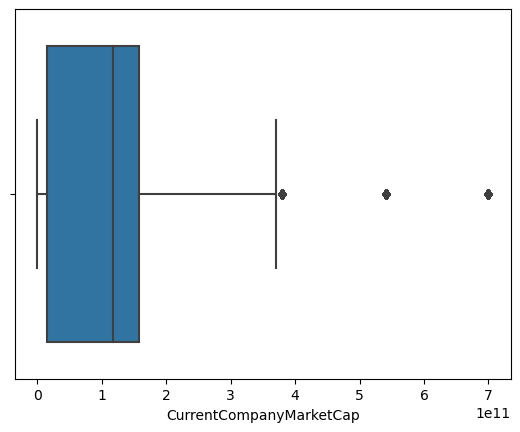

In [265]:
sb.boxplot(x='CurrentCompanyMarketCap',data=df) 
#Decision: Use min max scalar to scale the data to remove the impactive outliers

## Exploratory Data Analysis
- Data Visualization with `StageName`

<Axes: xlabel='StageName'>

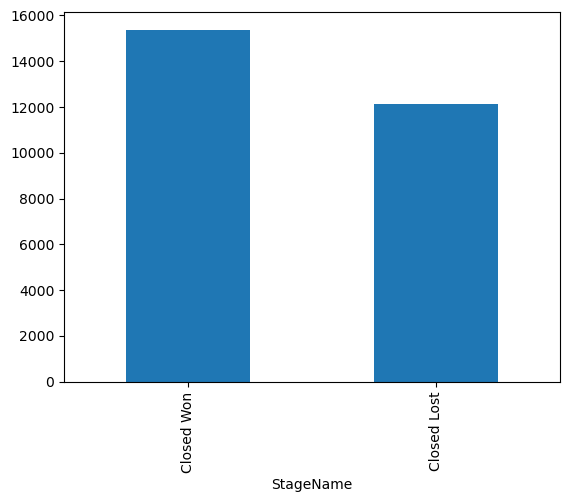

In [266]:
df['StageName'].value_counts().plot(kind='bar')

In [267]:
df['StageName'].value_counts()

StageName
Closed Won     15381
Closed Lost    12135
Name: count, dtype: int64

In [268]:
df['StageName'] = df['StageName'].map({'Closed Won': 1, 'Closed Lost': 0})
winRate = (sum(df['StageName'])/len(df['StageName'].index))*100
print(winRate)

55.898386393371126


<Axes: title={'center': 'Stage Name vs Impacted Fiscal Year'}, xlabel='ImpactedFY'>

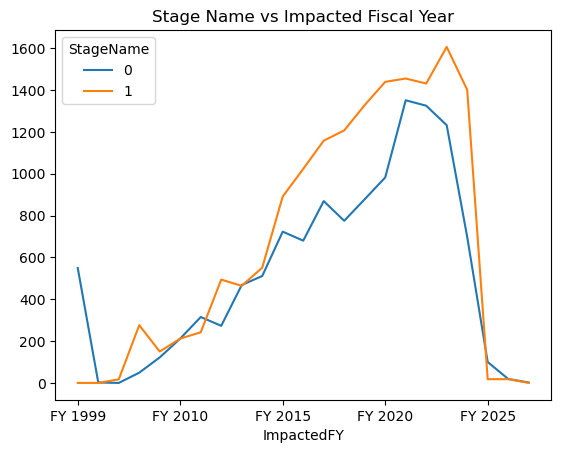

In [269]:
pd.crosstab(df['ImpactedFY'],df['StageName']).plot(kind='line', title = 'Stage Name vs Impacted Fiscal Year')

<Axes: title={'center': 'Stage Name vs Create Date Month'}, xlabel='CreateDateMonth'>

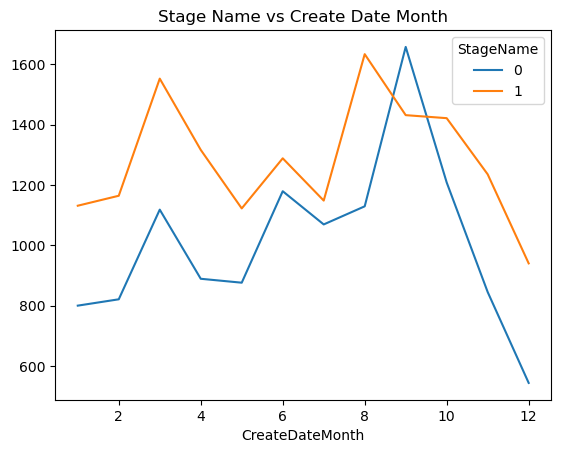

In [270]:
pd.crosstab(df['CreateDateMonth'],df['StageName']).plot(kind='line', title = 'Stage Name vs Create Date Month')

- set_index: Allows one or more column values to become the row index. Here, we are using the 'CreateDate' as the new index so we can create a graph against that value
- resample: Typically used for timeseries analysis. It generates a unique sampling distribution on the basis of actual data

In [271]:
df.head()

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,TotalOpportunityAmount,CreateDate,OpportunityOwner,StageName,CloseReason,ImpactedFY,CreateDateMonth
0,RxC,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",8.922738e+10,Large,False,False,Coram/CVS Copay Finder,New,7.481329e+05,2019-08-06 19:15:55,Andrew Burman,0,No Bid,FY 2020,8
1,RxC,Caris-MPI,Caris-MPI,8.922738e+10,Large,False,False,Precision Medicine Survey,New,2.000000e+05,2017-05-31 15:15:14,Jennifer Frytak,0,Client Funding Cut,FY 2018,5
2,RxC,Pharma Pac,Pharma Pac,8.922738e+10,Large,False,False,Pharma Pac,New,1.738380e+05,2020-04-09 15:52:13,Ryan Grimmett,0,Cancelled,FY 2022,4
3,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.922738e+10,Large,False,False,Biologics RARE - Launched for FY22 Tracking,Renewal,4.498679e+07,2021-02-04 14:55:41,Laura Sieve,1,Won,FY 2022,2
4,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.922738e+10,Large,False,False,Biologics ONC - Launched for FY22 Tracking,Renewal,1.808600e+07,2021-04-27 15:01:37,Laura Sieve,1,Won,FY 2022,4


<Axes: title={'center': 'Total Wins by Create Date'}, xlabel='CreateDate'>

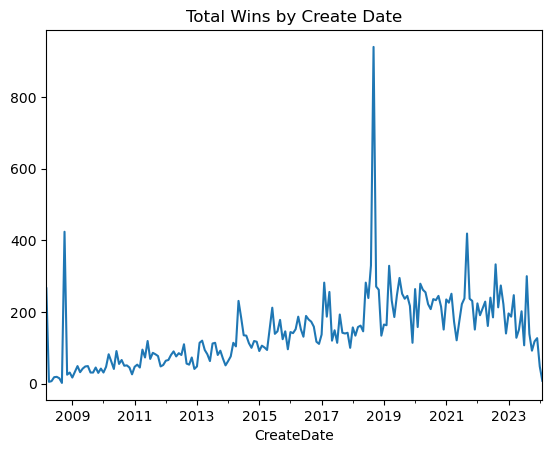

In [272]:
df.set_index('CreateDate', inplace = True)
df.resample('1M').count()['StageName'].plot(title = 'Total Wins by Create Date')

<Axes: title={'center': 'Stage Name by Legacy SF Instance'}, xlabel='LegacySFInstance'>

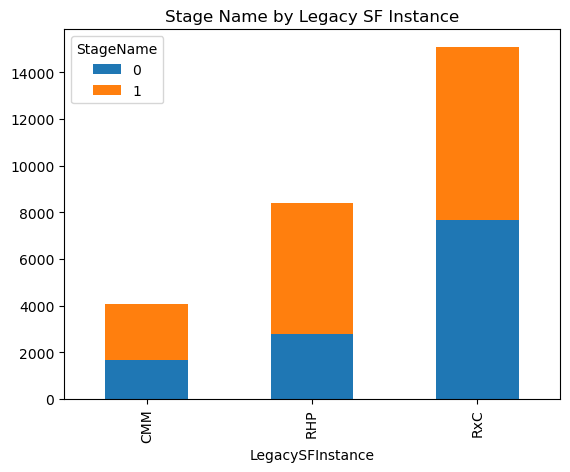

In [273]:
#compare wins over LegacySFInstance
pd.crosstab(df['LegacySFInstance'],df['StageName']).plot(kind="bar", stacked=True, title = "Stage Name by Legacy SF Instance")

<Axes: title={'center': 'Stage Name by Market Cap Category'}, xlabel='CurrentCompanyMarketCapCategory'>

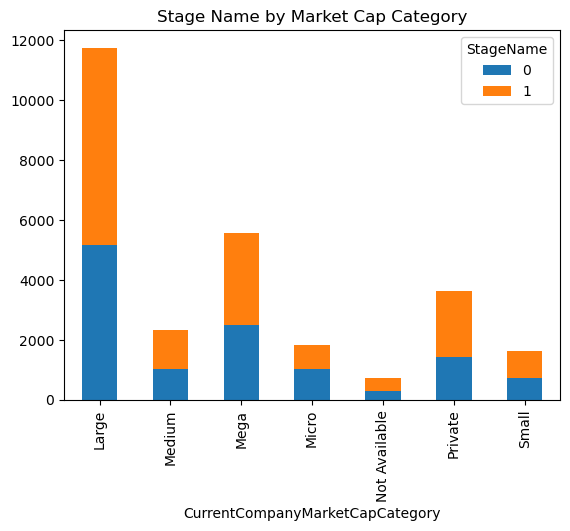

In [274]:
#compare wins by CurrentCompanyMarketCapCategory
pd.crosstab(df['CurrentCompanyMarketCapCategory'],df['StageName']).plot(kind="bar", stacked=True, title="Stage Name by Market Cap Category")

In [276]:
df.reset_index('CreateDate', inplace= True)

In [277]:
df.head()

,CreateDate,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCap,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,TotalOpportunityAmount,OpportunityOwner,StageName,CloseReason,ImpactedFY,CreateDateMonth
0,2019-08-06 19:15:55,RxC,"Coram Speciality Infusion Services, Inc.","Coram Speciality Infusion Services, Inc.",8.922738e+10,Large,False,False,Coram/CVS Copay Finder,New,7.481329e+05,Andrew Burman,0,No Bid,FY 2020,8
1,2017-05-31 15:15:14,RxC,Caris-MPI,Caris-MPI,8.922738e+10,Large,False,False,Precision Medicine Survey,New,2.000000e+05,Jennifer Frytak,0,Client Funding Cut,FY 2018,5
2,2020-04-09 15:52:13,RxC,Pharma Pac,Pharma Pac,8.922738e+10,Large,False,False,Pharma Pac,New,1.738380e+05,Ryan Grimmett,0,Cancelled,FY 2022,4
3,2021-02-04 14:55:41,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.922738e+10,Large,False,False,Biologics RARE - Launched for FY22 Tracking,Renewal,4.498679e+07,Laura Sieve,1,Won,FY 2022,2
4,2021-04-27 15:01:37,RxC,Biologics Financial Reconciliation,Biologics Financial Reconciliation,8.922738e+10,Large,False,False,Biologics ONC - Launched for FY22 Tracking,Renewal,1.808600e+07,Laura Sieve,1,Won,FY 2022,4


## Encoding
- Model cannot interpret strings, so we need to encode all the variables as numbers
- Drop columns that have too many categories
- Dummy variables
- Curse of dimensionality 

In [283]:
df.describe(include='object')

,LegacySFInstance,LegacyAccountName,CurrentCompanyGroup,CurrentCompanyMarketCapCategory,Top12CMMCompany,Top24CMMCompany,OpportunityName,OpportunityType,OpportunityOwner,CloseReason,ImpactedFY,CreateDateMonth
count,27516,27516,27516,27516,27516,27516,27516,27516,27516,27516,27516,27516
unique,3,1628,919,7,2,2,25836,3,249,76,23,12
top,RxC,"Merck & Co., Inc.",Bristol Myers Squibb,Large,False,False,2016 Mid-America Cancer Symposium,New,Admin User,Won,FY 2023,9
freq,15084,845,1487,11751,17489,23064,36,19521,2532,13366,2838,3088


In [284]:
df = df.drop(columns=['LegacyAccountName', 'CurrentCompanyGroup', 'OpportunityName', 'OpportunityOwner', 'CloseReason', 'CreateDate'])

In [285]:
#'drop_first' argument is set to true to reduce redundancy and reduce the correlations created with the dummy variables
df = pd.get_dummies(df, columns=["LegacySFInstance", "CurrentCompanyMarketCapCategory", "Top12CMMCompany", "Top24CMMCompany", "OpportunityType","ImpactedFY", "CreateDateMonth"], prefix=["LegacySFInstance", "CurrentCompanyMarketCapCategory", "Top12CMMCompany", "Top24CMMCompany", "OpportunityType","ImpactedFY", "CreateDateMonth"], drop_first = True)     

In [286]:
df.head()

,CurrentCompanyMarketCap,TotalOpportunityAmount,StageName,LegacySFInstance_RHP,LegacySFInstance_RxC,CurrentCompanyMarketCapCategory_Medium,CurrentCompanyMarketCapCategory_Mega,CurrentCompanyMarketCapCategory_Micro,CurrentCompanyMarketCapCategory_Not Available,CurrentCompanyMarketCapCategory_Private,...,CreateDateMonth_3,CreateDateMonth_4,CreateDateMonth_5,CreateDateMonth_6,CreateDateMonth_7,CreateDateMonth_8,CreateDateMonth_9,CreateDateMonth_10,CreateDateMonth_11,CreateDateMonth_12
0,8.922738e+10,7.481329e+05,0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,8.922738e+10,2.000000e+05,0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,8.922738e+10,1.738380e+05,0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,8.922738e+10,4.498679e+07,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.922738e+10,1.808600e+07,1,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27516 entries, 0 to 27515
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CurrentCompanyMarketCap                        27516 non-null  float64
 1   TotalOpportunityAmount                         27516 non-null  float64
 2   StageName                                      27516 non-null  int64  
 3   LegacySFInstance_RHP                           27516 non-null  bool   
 4   LegacySFInstance_RxC                           27516 non-null  bool   
 5   CurrentCompanyMarketCapCategory_Medium         27516 non-null  bool   
 6   CurrentCompanyMarketCapCategory_Mega           27516 non-null  bool   
 7   CurrentCompanyMarketCapCategory_Micro          27516 non-null  bool   
 8   CurrentCompanyMarketCapCategory_Not Available  27516 non-null  bool   
 9   CurrentCompanyMarketCapCategory_Private        275

In [288]:
df = df.replace({True: 1, False: 0})

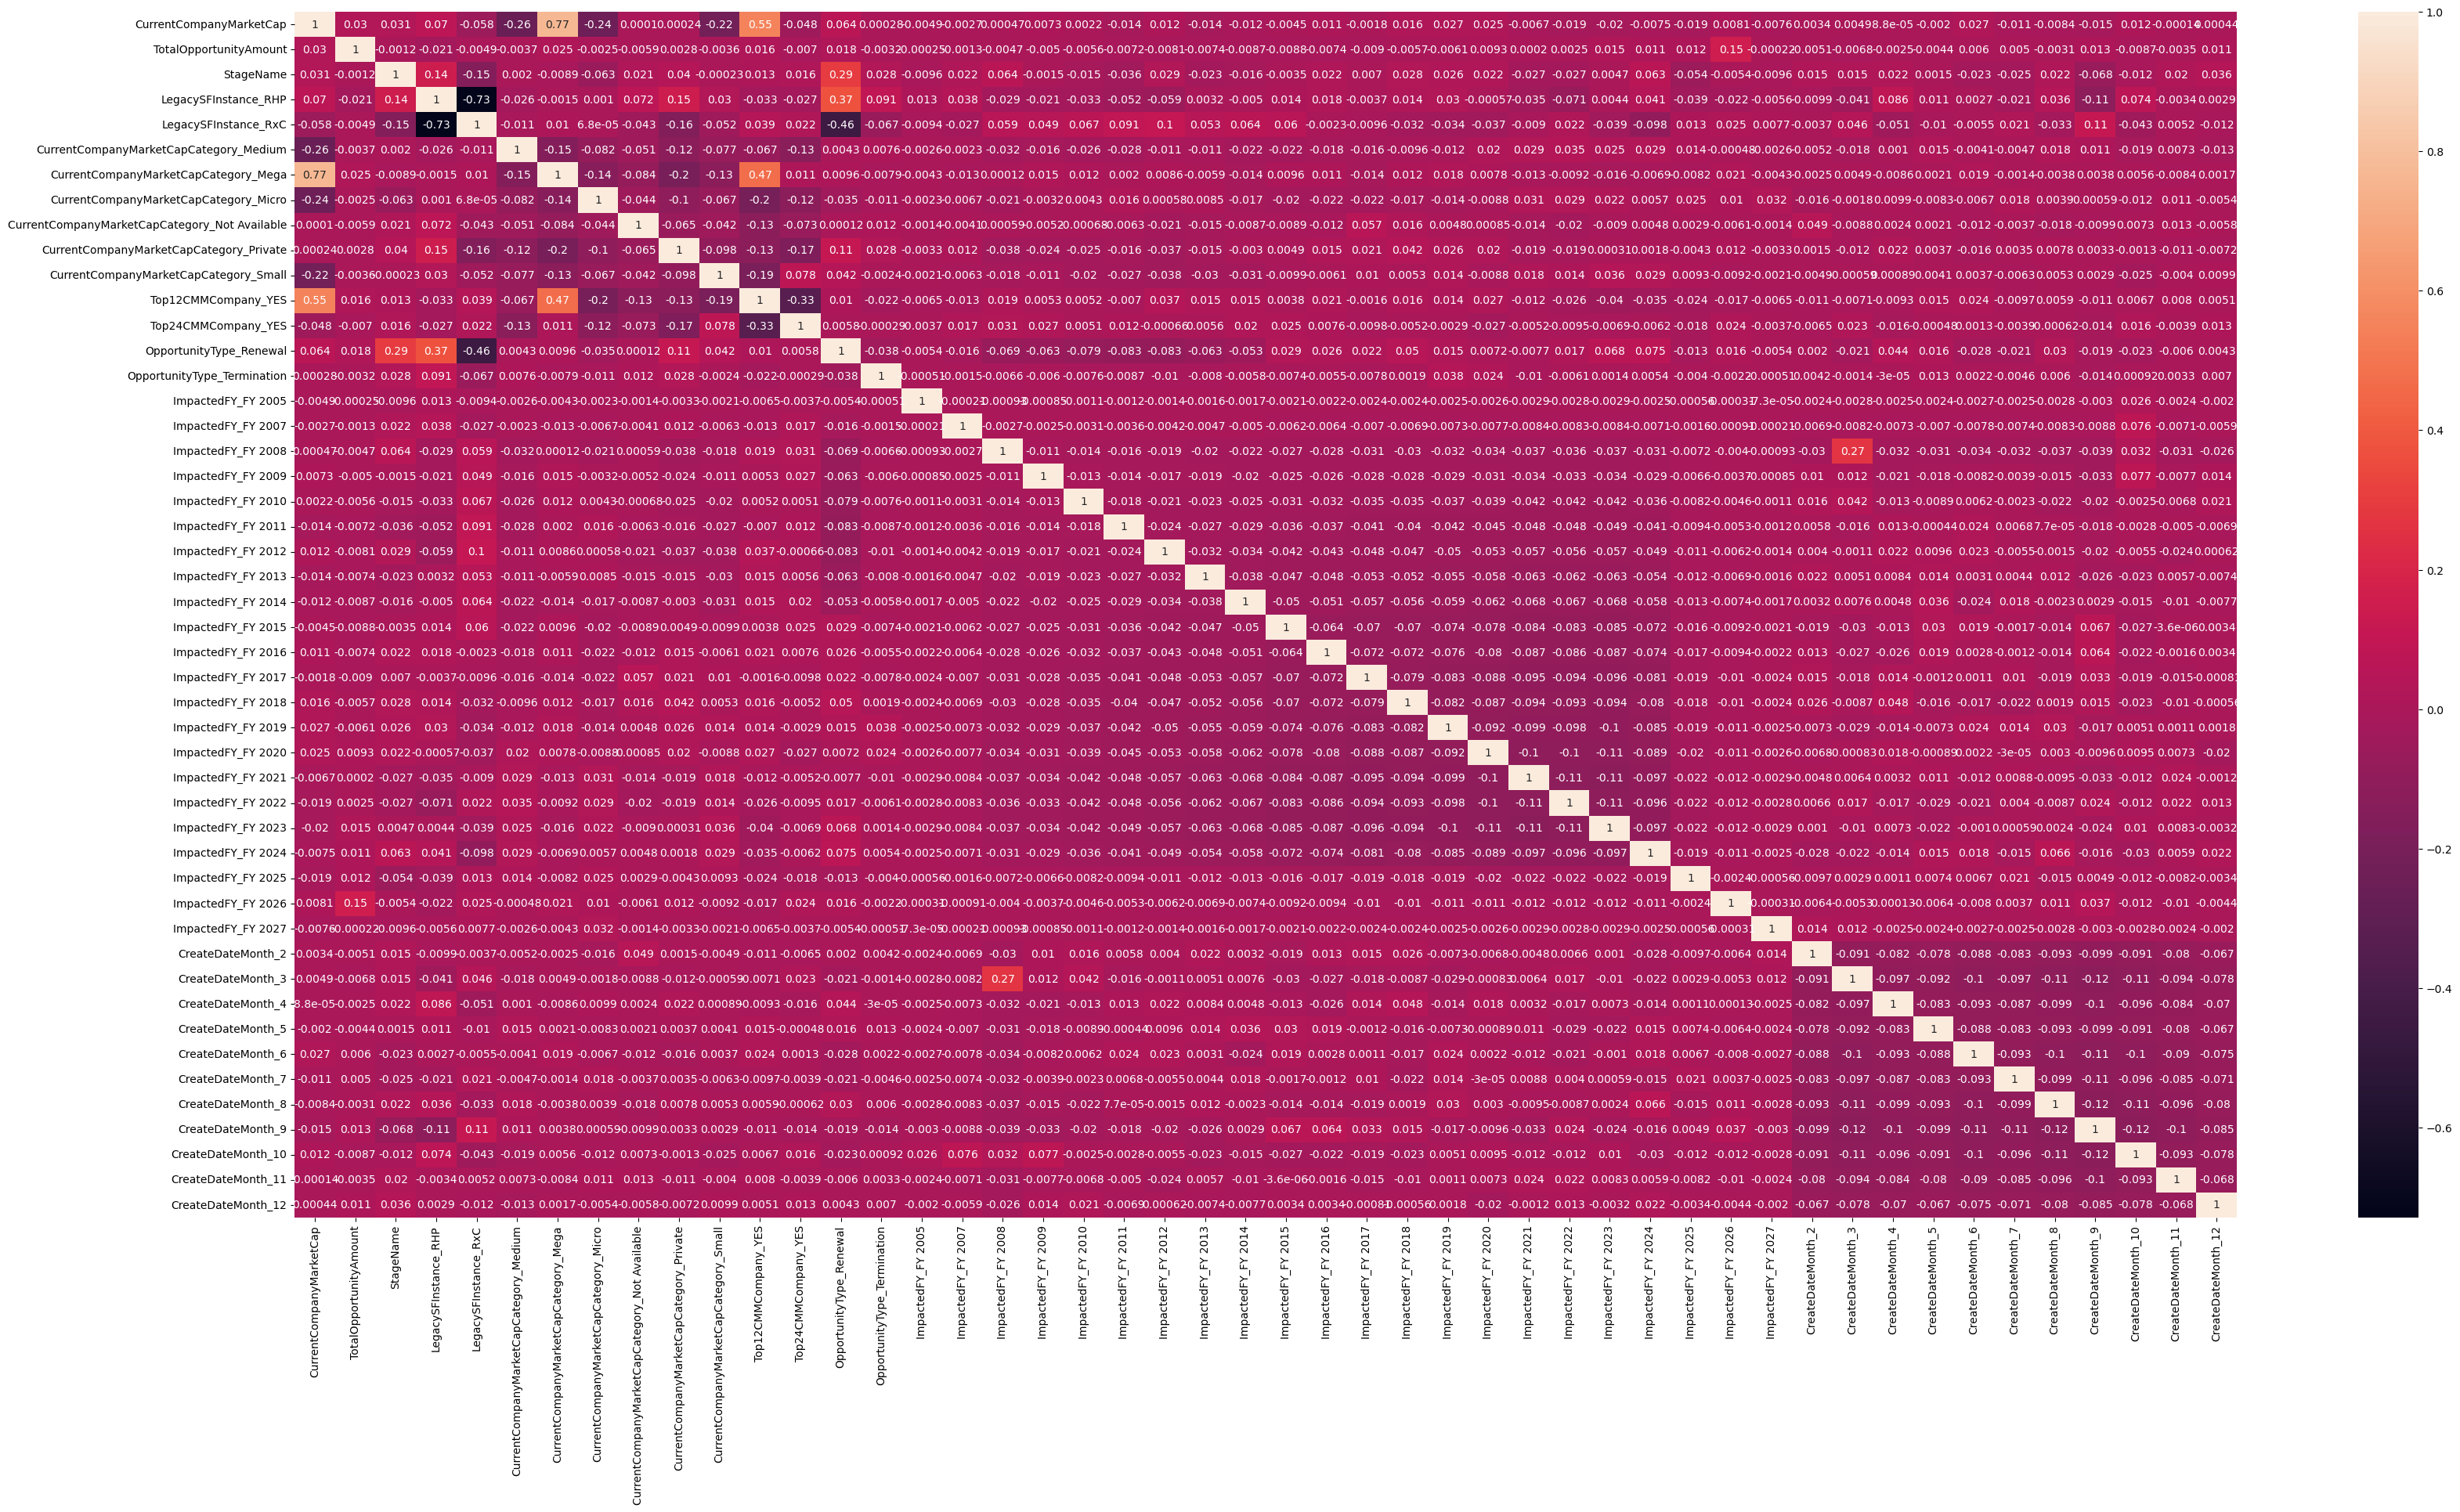

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40,20))
sb.heatmap(df.corr(), annot = True)
plt.show()

Since we know there is a correlation between the top 12 and 24 CMM Company variables, we will drop `Top12CMMCompany_YES` from our independent variables

In [297]:
X = df.drop(['StageName', 'Top12CMMCompany_YES'], axis=1)
y = df['StageName']

### Splitting data into testing and training sets
- 70/30 split

In [199]:
from sklearn.model_selection import train_test_split #split train and test set
from sklearn.preprocessing import MinMaxScaler #scale features
import numpy as np

In [298]:
######split data
#split the training and testing sets
 
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
 

In [299]:
X_train.shape

(19261, 46)

In [300]:
X_test.shape

(8255, 46)

### Scale the data
When scaling the data, the scaler function returns an array of the values, so we convert it back to a dataframe after the transformation
- Purpose: To remove outliers

In [301]:
# instantiate the scaler
scaler = MinMaxScaler()

In [303]:
#scale between 0 and 1 returns array
X_train_array = scaler.fit_transform(X_train)
X_train_array

array([[0.77387707, 0.00243334, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30620421, 0.00253117, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0668237 , 0.00297875, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10045938, 0.0023842 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2719917 , 0.00237183, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04350377, 0.00254376, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [304]:
#convert back to df
X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
X_train

,CurrentCompanyMarketCap,TotalOpportunityAmount,LegacySFInstance_RHP,LegacySFInstance_RxC,CurrentCompanyMarketCapCategory_Medium,CurrentCompanyMarketCapCategory_Mega,CurrentCompanyMarketCapCategory_Micro,CurrentCompanyMarketCapCategory_Not Available,CurrentCompanyMarketCapCategory_Private,CurrentCompanyMarketCapCategory_Small,...,CreateDateMonth_3,CreateDateMonth_4,CreateDateMonth_5,CreateDateMonth_6,CreateDateMonth_7,CreateDateMonth_8,CreateDateMonth_9,CreateDateMonth_10,CreateDateMonth_11,CreateDateMonth_12
8186,0.773877,0.002433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8381,0.306204,0.002531,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9077,0.066824,0.002979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11444,0.167787,0.002370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16303,0.020501,0.002351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.119323,0.002401,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,0.190290,0.002351,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9845,0.100459,0.002384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10799,0.271992,0.002372,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
#Scale between 0 and 1 returns array
X_test_array = scaler.transform(X_test)
 
X_test_array

array([[0.30620421, 0.00235067, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02067727, 0.0034311 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29360019, 0.00235067, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01852084, 0.00243882, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30620421, 0.00255216, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05573262, 0.00402739, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [306]:
#convert back to df
X_test = pd.DataFrame(X_test_array, columns=X_test.columns, index=X_test.index)
 
X_test

,CurrentCompanyMarketCap,TotalOpportunityAmount,LegacySFInstance_RHP,LegacySFInstance_RxC,CurrentCompanyMarketCapCategory_Medium,CurrentCompanyMarketCapCategory_Mega,CurrentCompanyMarketCapCategory_Micro,CurrentCompanyMarketCapCategory_Not Available,CurrentCompanyMarketCapCategory_Private,CurrentCompanyMarketCapCategory_Small,...,CreateDateMonth_3,CreateDateMonth_4,CreateDateMonth_5,CreateDateMonth_6,CreateDateMonth_7,CreateDateMonth_8,CreateDateMonth_9,CreateDateMonth_10,CreateDateMonth_11,CreateDateMonth_12
25921,0.306204,0.002351,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9327,0.020677,0.003431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7982,0.293600,0.002351,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1127,0.000117,0.002363,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9675,0.028988,0.002392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.031218,0.002789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20611,0.190290,0.002435,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10009,0.018521,0.002439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25857,0.306204,0.002552,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [308]:
import statsmodels.api as sm #logistic regression with summary

### Logistic Regression Modeling
- Focus on p (probability) values for feature elimination
- Null Hypothesis: Feature does not affect the `StageName`
- Alternate Hypothesis: Feature does affect the `StageName`
- P-value: How likely the data could have occurred under the null hypothesis
- Any feature that has a p-value less than .05 is statistically significant, and we conclude that the feature does affect the `StageName`

In [64]:
# Logistic regression model using statsmodels for summary and p values
lm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              StageName   No. Observations:                19261
Model:                            GLM   Df Residuals:                    19214
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11715.
Date:                Fri, 23 Feb 2024   Deviance:                       23430.
Time:                        09:57:48   Pearson chi2:                 1.88e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.1452
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           -26.9883   1.81e+04     -0.001      0.999   -3.54e+04    3.54e+04
CurrentCompanyMarketCap                           0.2429      0.132      1.839      0.066      -0.016       0.502
TotalOpportunityAmount                           -1.1164      1.290     -0.865      0.387      -3.646       1.413
LegacySFInstance_RHP                              0.3311      0.053      6.230      0.000       0.227       0.435
LegacySFInstance_RxC                             -0.0458      0.049     -0.941      0.347      -0.141       0.050
CurrentCompanyMarketCapCategory_Medium            0.0285      0.063      0.450      0.652      -0.096       0.153
CurrentCompanyMarketCapCategory_Mega             -0.2034      0.065     -3.128      0.002      -0.331      -0.076
CurrentCompanyMarketCapCategory_Micro            -0.4572      0.069     -6.612      0.000      -0.593      -0.322
CurrentCompanyMarketCapCategory_Not Available     0.2317      0.104      2.238      0.025       0.029       0.435
CurrentCompanyMarketCapCategory_Private          -0.0787      0.053     -1.498      0.134      -0.182       0.024
CurrentCompanyMarketCapCategory_Small            -0.1734      0.072     -2.415      0.016      -0.314      -0.033
Top24CMMCompany_YES                               0.0530      0.045      1.171      0.241      -0.036       0.142
OpportunityType_Renewal                           1.3278      0.042     31.303      0.000       1.245       1.411
OpportunityType_Termination                       0.7430      0.273      2.722      0.006       0.208       1.278
ImpactedFY_FY 2005                                0.0630   3.57e+05   1.77e-07      1.000   -6.99e+05    6.99e+05
ImpactedFY_FY 2007                               53.1637   1.09e+05      0.000      1.000   -2.13e+05    2.13e+05
ImpactedFY_FY 2008                               28.9442   1.81e+04      0.002      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2009                               27.3439   1.81e+04      0.002      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2010                               26.9907   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2011                               26.7852   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2012                               27.6194   1.81e+04      0.002      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2013                               26.8044   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2014                               26.9103   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
ImpactedFY_FY 2015                               26.7522   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
Impac

### Feature Elimination

In [325]:
from sklearn.linear_model import LogisticRegression # logistic regression with RFE
from sklearn.feature_selection import RFE #recursive feature elimination

In [326]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #variable selection

In [327]:
#######model reduction
 
# Use the sklearn logistic regression model for RFE and VIF features
 
##instantiate logistic regression model
lr = LogisticRegression()

In [330]:
#RFE
#instead of backward/forward stepwise elimination based on p value we will have rfe do it for us targeting 10 results.
 
#instantiate with options
rfe = RFE(estimator=lr, n_features_to_select=10) # target 10 top features with RFE

In [331]:
#fit rfe
rfe = rfe.fit(X_train, y_train)

In [332]:
# show RFE support and ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
#the 10 columns with true for support were chosen by rfe and ranked first most important

[('CurrentCompanyMarketCap', False, 20),
 ('TotalOpportunityAmount', False, 14),
 ('LegacySFInstance_RHP', False, 17),
 ('LegacySFInstance_RxC', False, 33),
 ('CurrentCompanyMarketCapCategory_Medium', False, 34),
 ('CurrentCompanyMarketCapCategory_Mega', False, 21),
 ('CurrentCompanyMarketCapCategory_Micro', False, 15),
 ('CurrentCompanyMarketCapCategory_Not Available', False, 19),
 ('CurrentCompanyMarketCapCategory_Private', False, 28),
 ('CurrentCompanyMarketCapCategory_Small', False, 24),
 ('Top24CMMCompany_YES', False, 32),
 ('OpportunityType_Renewal', False, 10),
 ('OpportunityType_Termination', False, 11),
 ('ImpactedFY_FY 2005', False, 27),
 ('ImpactedFY_FY 2007', True, 1),
 ('ImpactedFY_FY 2008', True, 1),
 ('ImpactedFY_FY 2009', True, 1),
 ('ImpactedFY_FY 2010', False, 8),
 ('ImpactedFY_FY 2011', False, 9),
 ('ImpactedFY_FY 2012', True, 1),
 ('ImpactedFY_FY 2013', False, 7),
 ('ImpactedFY_FY 2014', False, 5),
 ('ImpactedFY_FY 2015', False, 3),
 ('ImpactedFY_FY 2016', True, 1),

In [333]:
# save supported columns
col = X_train.columns[rfe.support_]

In [334]:
col

Index(['ImpactedFY_FY 2007', 'ImpactedFY_FY 2008', 'ImpactedFY_FY 2009',
       'ImpactedFY_FY 2012', 'ImpactedFY_FY 2016', 'ImpactedFY_FY 2017',
       'ImpactedFY_FY 2018', 'ImpactedFY_FY 2019', 'ImpactedFY_FY 2020',
       'ImpactedFY_FY 2024'],
      dtype='object')

In [335]:
#redefine xtrain as a subset based on the cols selected by rfe
#add the constant back to the set of columns for the model
X_train = sm.add_constant(X_train[col])
 
X_train

,const,ImpactedFY_FY 2007,ImpactedFY_FY 2008,ImpactedFY_FY 2009,ImpactedFY_FY 2012,ImpactedFY_FY 2016,ImpactedFY_FY 2017,ImpactedFY_FY 2018,ImpactedFY_FY 2019,ImpactedFY_FY 2020,ImpactedFY_FY 2024
8186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9077,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13123,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [336]:
# build the second model based off the supported columns
lm = sm.GLM(y_train,X_train, family = sm.families.Binomial())
 
lm.fit().summary() #some high pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              StageName   No. Observations:                19261
Model:                            GLM   Df Residuals:                    19250
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13030.
Date:                Fri, 23 Feb 2024   Deviance:                       26060.
Time:                        12:35:30   Pearson chi2:                 1.93e+04
No. Iterations:                    21   Pseudo R-squ. (CS):            0.02009
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0021      0.020     -0.102      0.919      -0.042       0.038
ImpactedFY_FY 2007    22.5682   1.45e+04      0.002      0.999   -2.85e+04    2.85e+04
ImpactedFY_FY 2008     1.9092      0.197      9.705      0.000       1.524       2.295
ImpactedFY_FY 2009     0.3667      0.152      2.418      0.016       0.069       0.664
ImpactedFY_FY 2012     0.5916      0.091      6.505      0.000       0.413       0.770
ImpactedFY_FY 2016     0.4194      0.062      6.719      0.000       0.297       0.542
ImpactedFY_FY 2017     0.2484      0.057      4.339      0.000       0.136       0.361
ImpactedFY_FY 2018     0.3939      0.058      6.771      0.000       0.280       0.508
ImpactedFY_FY 2019     0.3969      0.056      7.148      0.000       0.288       0.506
ImpactedFY_FY 2020     0.3938      0.054      7.344      0.000       0.289       0.499
ImpactedFY_FY 2024     0.7396      0.060     12.308      0.000       0.622       0.857
======================================================================================
"""

In [338]:
#Remove P Values above threshold (.05)
X_train = X_train.drop(['ImpactedFY_FY 2007'], axis=1)
 
#rebuild the 3rd model with high pvalues removed
lm = sm.GLM(y_train,X_train, family = sm.families.Binomial())

In [339]:
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              StageName   No. Observations:                19261
Model:                            GLM   Df Residuals:                    19251
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13038.
Date:                Fri, 23 Feb 2024   Deviance:                       26076.
Time:                        12:36:46   Pearson chi2:                 1.93e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01931
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0002      0.020      0.010      0.992      -0.040       0.040
ImpactedFY_FY 2008     1.9069      0.197      9.693      0.000       1.521       2.292
ImpactedFY_FY 2009     0.3644      0.152      2.402      0.016       0.067       0.662
ImpactedFY_FY 2012     0.5893      0.091      6.480      0.000       0.411       0.767
ImpactedFY_FY 2016     0.4171      0.062      6.683      0.000       0.295       0.539
ImpactedFY_FY 2017     0.2461      0.057      4.299      0.000       0.134       0.358
ImpactedFY_FY 2018     0.3916      0.058      6.732      0.000       0.278       0.506
ImpactedFY_FY 2019     0.3946      0.056      7.107      0.000       0.286       0.503
ImpactedFY_FY 2020     0.3915      0.054      7.302      0.000       0.286       0.497
ImpactedFY_FY 2024     0.7373      0.060     12.271      0.000       0.620       0.855
======================================================================================
"""

In [345]:
    #VIF
######check VIF for correlation
 
#create a dataframe containing VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
 
print(vif) # all under 10-15
 
#no issues with correlation

             Features   VIF
0               const  2.01
7  ImpactedFY_FY 2019  1.07
8  ImpactedFY_FY 2020  1.07
4  ImpactedFY_FY 2016  1.06
5  ImpactedFY_FY 2017  1.06
6  ImpactedFY_FY 2018  1.06
9  ImpactedFY_FY 2024  1.06
3  ImpactedFY_FY 2012  1.03
1  ImpactedFY_FY 2008  1.01
2  ImpactedFY_FY 2009  1.01


In [346]:
#create predictions for revenue probability
y_train_predic = lm.fit().predict(X_train)
 
print(y_train_predic)

8186     0.676450
8381     0.500052
9077     0.500052
11444    0.500052
16303    0.500052
           ...   
13123    0.500052
19648    0.500052
9845     0.596717
10799    0.500052
2732     0.500052
Length: 19261, dtype: float64


In [347]:
#compare predicted probability in training set to actual labels in training set
y_train_predic2 = pd.DataFrame({'StageName':y_train.values, 'StageNameProbability':y_train_predic})
y_train_predic2.head()
 


,StageName,StageNameProbability
8186,1,0.676450
8381,1,0.500052
9077,0,0.500052
11444,1,0.500052
16303,1,0.500052


In [348]:
#label probability at 50%
y_train_predic2['Prediction'] = y_train_predic2.StageNameProbability.map(lambda x: 1 if x > 0.5 else 0)
y_train_predic2.head()


,StageName,StageNameProbability,Prediction
8186,1,0.676450,1
8381,1,0.500052,1
9077,0,0.500052,1
11444,1,0.500052,1
16303,1,0.500052,1


In [349]:
from sklearn import metrics #model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #model performance
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score #Receiver operating characteristic
### confusion matrix to understand how good the model is 
cmatrix = metrics.confusion_matrix(y_train_predic2.StageName, y_train_predic2.Prediction )
print(cmatrix)

[[    0  8534]
 [    0 10727]]


In [350]:
### check cmatrix for train
 
TN = cmatrix[0,0] # true negatives
print("True Negatives", TN)
FP = cmatrix[0,1] # false positives
print("False Positives", FP)
FN = cmatrix[1,0] # false negatives
print("False Negatives", FN)
TP = cmatrix[1,1] # true positive 
print("True Positives", TP)

True Negatives 0
False Positives 8534
False Negatives 0
True Positives 10727


In [351]:
accuracy = metrics.accuracy_score(y_train_predic2.StageName, y_train_predic2.Prediction)
#(TN+TP) / (TP+TN+FP+FN)
print("Accuracy", accuracy) #56%
 
sensitivity = TP / (TP+FN)
print("Sensitivity", sensitivity) #100%
 
specificity = TN/ (TN+FP)
print("Specificity", specificity) #0%
 
precision = TP / (TP+FP)
print("Precision", precision) #56%

Accuracy 0.5569285083848191
Sensitivity 1.0
Specificity 0.0
Precision 0.5569285083848191


In [353]:
X_train

,const,ImpactedFY_FY 2008,ImpactedFY_FY 2009,ImpactedFY_FY 2012,ImpactedFY_FY 2016,ImpactedFY_FY 2017,ImpactedFY_FY 2018,ImpactedFY_FY 2019,ImpactedFY_FY 2020,ImpactedFY_FY 2024
8186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9077,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13123,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [357]:
######apply model to test
 
#match X_test to X_train shape
cols_to_keep = ['ImpactedFY_FY 2008', 'ImpactedFY_FY 2009', 'ImpactedFY_FY 2012', 'ImpactedFY_FY 2016', 'ImpactedFY_FY 2017', 'ImpactedFY_FY 2018', 'ImpactedFY_FY 2019', 'ImpactedFY_FY 2020', 'ImpactedFY_FY 2024']
X_test = X_test[cols_to_keep]
X_test = sm.add_constant(X_test)

In [358]:
X_test

,const,ImpactedFY_FY 2008,ImpactedFY_FY 2009,ImpactedFY_FY 2012,ImpactedFY_FY 2016,ImpactedFY_FY 2017,ImpactedFY_FY 2018,ImpactedFY_FY 2019,ImpactedFY_FY 2020,ImpactedFY_FY 2024
25921,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7982,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
225,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20611,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [359]:
#use the final model from the training set to predict
y_test_predic = lm.fit().predict(X_test)
 
y_test_predic

25921    0.500052
9327     0.500052
7982     0.500052
1127     0.500052
9675     0.500052
           ...   
225      0.602831
20611    0.602831
10009    0.500052
25857    0.602831
24748    0.602831
Length: 8255, dtype: float64

In [360]:
#compare predicted probability in training set to actual labels in training set
y_test_predic2 = pd.DataFrame({'StageName':y_test.values, 'StageNameProbability':y_test_predic})
y_test_predic2.head()

,StageName,StageNameProbability
25921,1,0.500052
9327,1,0.500052
7982,0,0.500052
1127,1,0.500052
9675,0,0.500052


In [361]:
#label probability at 50%
y_test_predic2['Prediction'] = y_test_predic2.StageNameProbability.map(lambda x: 1 if x > 0.5 else 0)
y_test_predic2.head()

,StageName,StageNameProbability,Prediction
25921,1,0.500052,1
9327,1,0.500052,1
7982,0,0.500052,1
1127,1,0.500052,1
9675,0,0.500052,1


In [362]:
### confusion matrix to understand how good the model is 
cmatrix2 = metrics.confusion_matrix(y_test_predic2.StageName, y_test_predic2.Prediction )
print(cmatrix2)

[[   0 3601]
 [   0 4654]]


In [363]:
TN2 = cmatrix2[0,0] # true negatives
print("True Negatives", TN2)
FP2 = cmatrix2[0,1] # false positives
print("False Positives", FP2)
FN2 = cmatrix2[1,0] # false negatives
print("False Negatives", FN2)
TP2 = cmatrix2[1,1] # true positive 
print("True Positives", TP2)

True Negatives 0
False Positives 3601
False Negatives 0
True Positives 4654


In [364]:
accuracy = metrics.accuracy_score(y_test_predic2.StageName, y_test_predic2.Prediction)
#(TN+TP) / (TP+TN+FP+FN)
print("Accuracy", accuracy) #88.83% train -> 87.51% test
 
sensitivity = TP2 / (TP2+FN2)
print("Sensitivity", sensitivity) #37.87% train -> 36.50% test
 
specificity = TN2/ (TN2+FP2)
print("Specificity", specificity) #97.75% train -> 97.82% test
 
precision = TP2 / (TP2+FP2)
print("Precision", precision) #74.69 train -> 77.21% test

Accuracy 0.5637795275590551
Sensitivity 1.0
Specificity 0.0
Precision 0.5637795275590551


In [365]:
######check ROC/AUC
 
#set up train variables
fpr, tpr, thresholds = roc_curve(y_train, y_train_predic)
roc_auc = roc_auc_score(y_train, y_train_predic)

In [366]:
#set up test variables
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_predic)
roc_auc2 = roc_auc_score(y_test, y_test_predic)

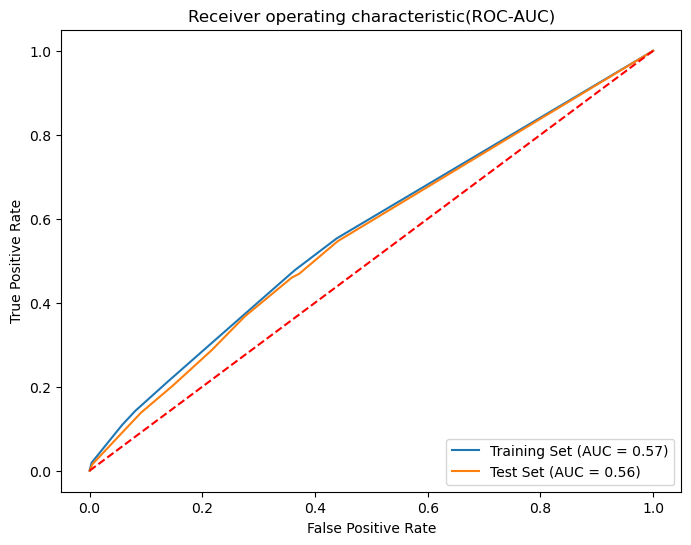

In [367]:
#create figure and subplots for training and test sets
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Training Set (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2,label='Test Set (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC-AUC)')
plt.legend(loc="lower right")
plt.show()